 ## **Data analysis using python - blinkit**

#### **Import library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading Raw Data

In [2]:
df = pd.read_csv('blinkit_data.csv')

#### Sample Data 

In [3]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


#### Size of data its mentining rows and columns details

In [4]:
df.shape

(8523, 12)

#### Field Names

In [5]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

#### Data Types

In [6]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

####  Cleaning the Item Fat Content Column

##### First getting the unique values from the column

In [7]:
df["Item Fat Content"].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

#### Converting the lower case and short words into Proper Names

In [8]:
df["Item Fat Content"] = df["Item Fat Content"].replace({'LF': 'Low Fat',
                                                         'reg': 'Regular',
                                                          'low fat': 'Low Fat'})

##### Checking the unique values again

In [9]:
df["Item Fat Content"].unique()

array(['Regular', 'Low Fat'], dtype=object)

## **Bussiness Requirement**

In [10]:
# total sales
total_sales = df["Sales"].sum()
total_sales

np.float64(1201681.4808)

In [11]:
# average sales
avg_sales = df["Sales"].mean()
avg_sales

np.float64(140.9927819781767)

In [12]:
# total number of items sold
total_numberof_items_sold = df["Sales"].count()
total_numberof_items_sold

np.int64(8523)

In [13]:
# average rating
avg_rating = df["Rating"].mean()
avg_rating

np.float64(3.965857092573038)

In [14]:
# Displaying the data
print(f"Total Sales: ${total_sales:,.0f}")
print(f"Avg Sales: ${avg_sales:,.0f}")
print(f"Total number of items sold: {total_numberof_items_sold:.0f}")
print(f"Avg rating: {avg_rating:,.0f}")

Total Sales: $1,201,681
Avg Sales: $141
Total number of items sold: 8523
Avg rating: 4


## ** Charts Requirement**

#### Total sales by fat content

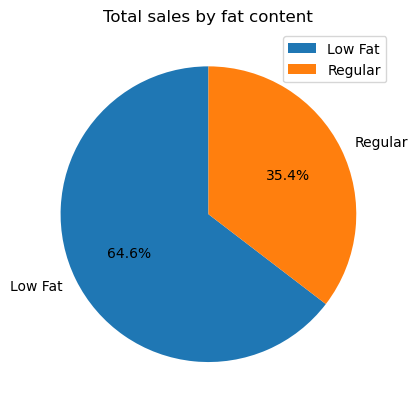

In [20]:
sales_by_fat = df.groupby("Item Fat Content")["Sales"].sum()
plt.pie(sales_by_fat,labels = sales_by_fat.index, autopct ="%0.1f%%", startangle =90)
plt.title("Total sales by fat content")
plt.legend()
plt.show()

#### Total Sales By Item Type

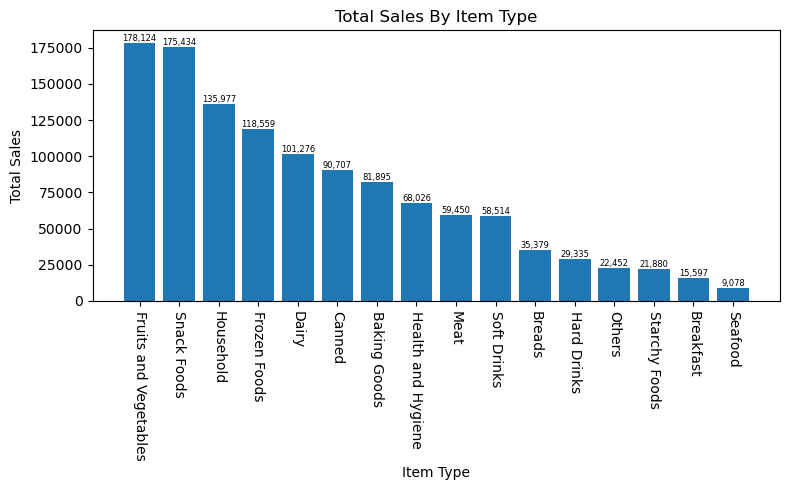

In [32]:
sale_by_item_type = df.groupby(["Item Type"])["Sales"].sum().sort_values(ascending = False)
plt.figure(figsize=(8,5))
bars = plt.bar(sale_by_item_type.index,sale_by_item_type.values)
plt.xticks(rotation = -90)
plt.xlabel("Item Type")
plt.ylabel("Total Sales")
plt.title("Total Sales By Item Type")
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() /2, bar.get_height(),
            f'{bar.get_height():,.0f}',ha = 'center', va = 'bottom', fontsize = 6)
plt.tight_layout()

plt.show()

#### Fat Content By Outlet For Total Sales

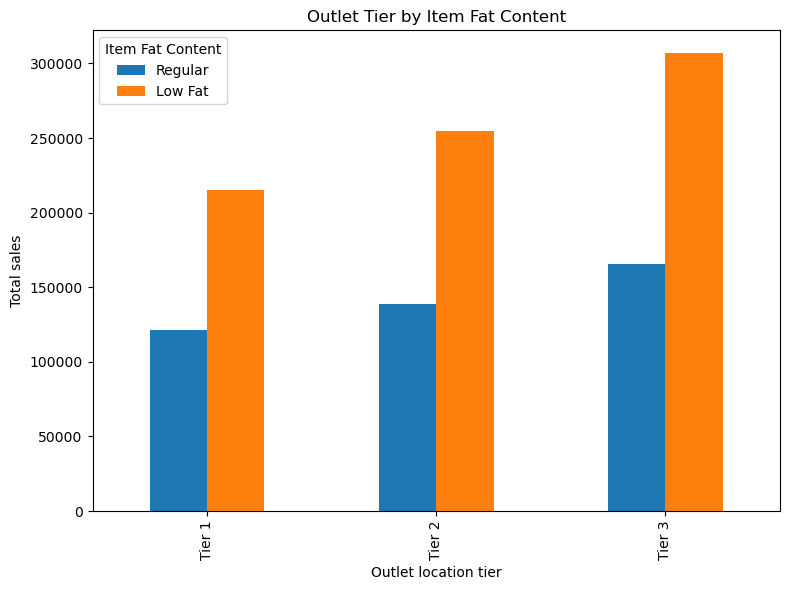

In [35]:
grouped = df.groupby(["Outlet Location Type","Item Fat Content"])["Sales"].sum().unstack()
grouped = grouped[["Regular", "Low Fat"]]

ax = grouped.plot(kind = 'bar', figsize=(8,6), title = "Outlet Tier by Item Fat Content")
plt.xlabel("Outlet location tier")
plt.ylabel("Total sales")
plt.legend(title = "Item Fat Content")
plt.tight_layout()
plt.show()

#### Total Sales By Outlet Establishment

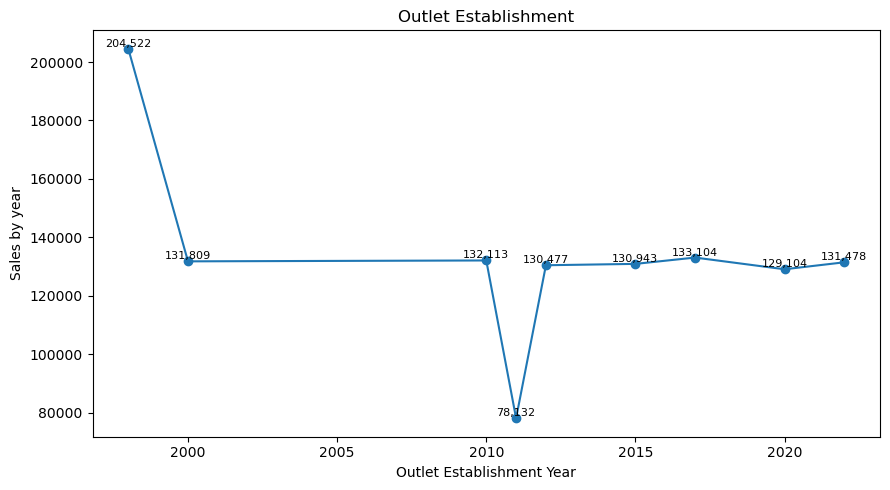

In [38]:
sales_by_year = df.groupby(["Outlet Establishment Year"])["Sales"].sum().sort_index()
plt.figure(figsize = (9,5))
plt.plot(sales_by_year.index,sales_by_year.values, marker ="o", linestyle = "-")
plt.xlabel("Outlet Establishment Year")
plt.ylabel("Sales by year")
plt.title("Outlet Establishment")

for x,y in zip(sales_by_year.index,sales_by_year.values):
    plt.text(x,y, f'{y:,.0f}',ha = "center", va = "bottom", fontsize = 8)

plt.tight_layout()
plt.show()

#### Sales By Outlet Size

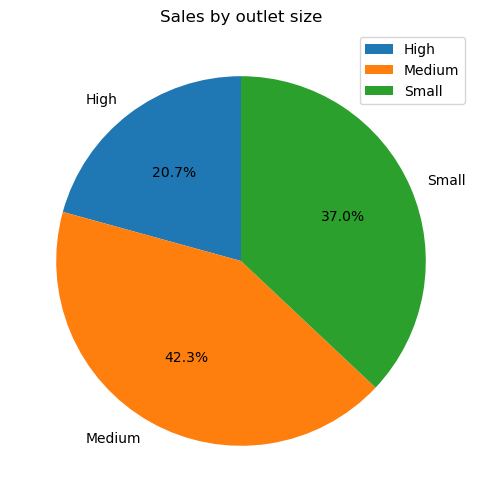

In [46]:
sale_by_outlet_size = df.groupby("Outlet Size")["Sales"].sum()

plt.figure(figsize = (6,6))
plt.pie(sale_by_outlet_size, labels = sale_by_outlet_size.index, autopct = "%.1f%%", startangle = 90)
plt.title("Sales by outlet size")
plt.legend()
plt.show()

#### Sales By Outlet Location 

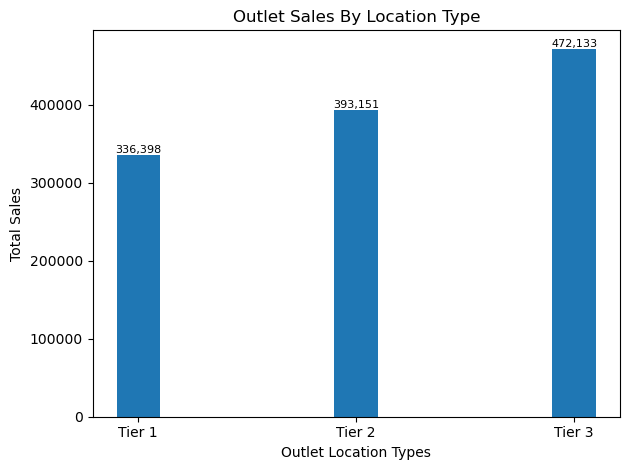

In [59]:
sales_by_outlet = df.groupby("Outlet Location Type")["Sales"].sum()

bars = plt.bar(sales_by_outlet.index,sales_by_outlet.values, width = 0.2)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{bar.get_height():,.0f}', ha = 'center', va = 'bottom', fontsize = 8)
plt.xlabel("Outlet Location Types")
plt.ylabel("Total Sales")
plt.title("Outlet Sales By Location Type")
plt.tight_layout()
plt.show()